In [1]:
# IMPORT PACKAGES
from em_examples.Base import widgetify
import em_examples.InductionLoop as IND
from ipywidgets import interact, FloatSlider, FloatText

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    


## App Parameter Descriptions

<img style="float: right; width: 500px" src="https://github.com/geoscixyz/em_apps/blob/master/images/InductionLoop.png?raw=true">

Below are the adjustable parameters for widgets within this notebook:

* $I_p$: Transmitter current amplitude [A]
* $a_{Tx}$: Transmitter loop radius [m]
* $a_{Rx}$: Receiver loop radius [m]
* $x_{Rx}$: Receiver x position [m]
* $z_{Rx}$: Receiver z position [m]
* $\theta$: Receiver normal vector relative to vertical [degrees]
* $R$: Resistance of receiver loop [$\Omega$]
* $L$: Inductance of receiver loop [H]
* $f$: Specific frequency [Hz]
* $t$: Specific time [s]

## Background Theory: Induced Currents due to a Step-Off Primary Signal

Consider the case in the image below, where a circular loop of wire ($Tx$) caries a time-varying current $I_p (t)$. According to the Biot-Savart law, this produces a time-varying primary magnetic field. The time-varying nature of the corresponding magnetic flux which passes through the receiver coil ($Rx$) generates an induced secondary current $I_s (t)$, which depends on the coil's resistance ($R$) and inductance ($L$). Here, we will provided final analytic results associated with the app below. A full derivation can be found at the bottom of the page.

For a step-off primary current of the form $I_p (t) = I_0 u(-t)$, the secondary current carried by ($Rx$) is given by:

\begin{equation}
I_s (t) = \frac{I_0 A \beta_n}{L} \, \textrm{e}^{-Rt/L} \, u(t)
\end{equation}

where $A$ is the area of $Rx$, $\beta$ contains the geometric information pertaining to the problem and $u(t)$ is the unit-step function.

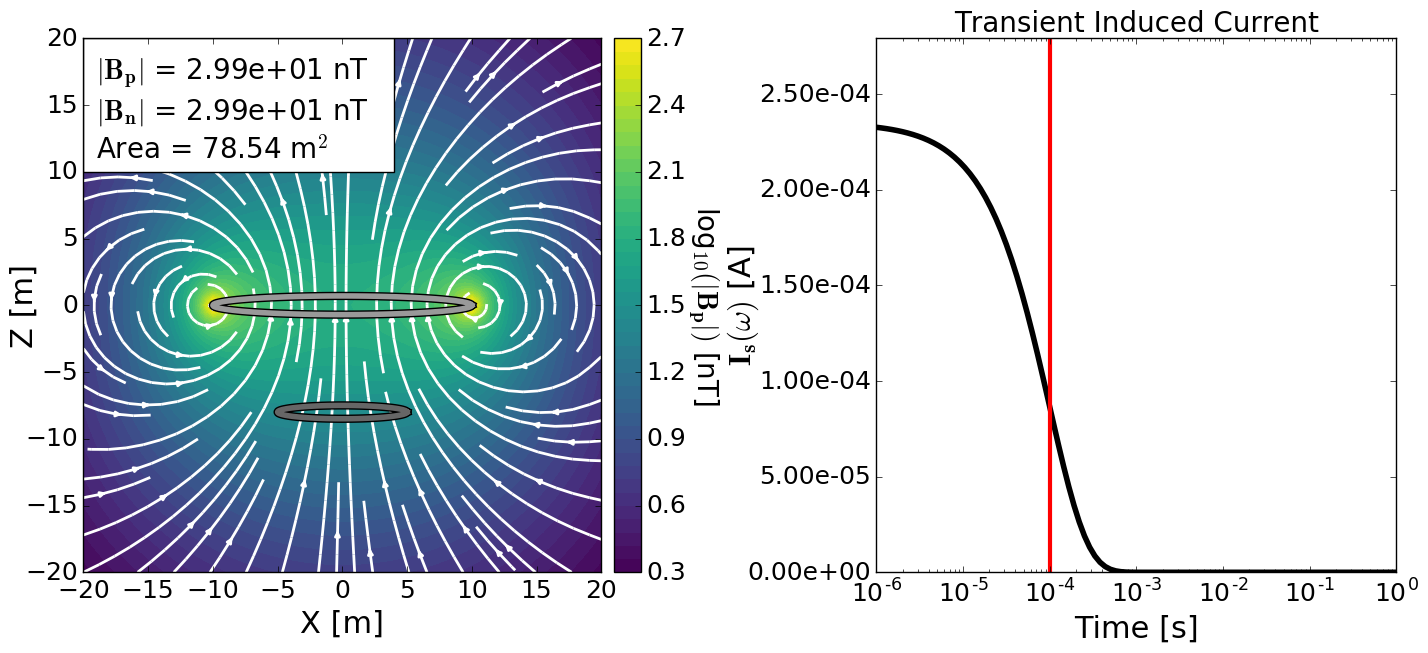

In [2]:
# RUN TRANSIENT WIDGET
widgetify(IND.fcn_TDEM_Widget,I=FloatSlider(min=0.01, max=100., value=1., step=1., continuous_update=False, description = "$I_0$"),\
                        a1=FloatSlider(min=1., max=20., value=10., step=1., continuous_update=False, description = "$a_{Tx}$"),\
                        a2=FloatSlider(min=1., max=20., value=5., step=1., continuous_update=False, description = "$a_{Rx}$"),\
                        xRx=FloatSlider(min=-15., max=15., value=0., step=1., continuous_update=False, description = "$x_{Rx}$"),\
                        zRx=FloatSlider(min=-15., max=15., value=-8., step=1., continuous_update=False, description = "$z_{Rx}$"),\
                        azm=FloatSlider(min=-90., max=90., value=0., step=10., continuous_update=False, description = "$\\theta$"),\
                        logR=FloatSlider(min=0, max=6, value=2, step=1., continuous_update=False, description = "$log_{10}(R)$"),\
                        logL=FloatSlider(min=-7, max=-2, value=-2, step=1., continuous_update=False, description = "$log_{10}(L)$"),\
                        logt=FloatSlider(min=-6, max=-2, value=-4, step=1., continuous_update=False, description = "$log_{10}(t)$"))
    

## Supporting Derivation for the Transient Response

Consider a transmitter loop which carries a primary current of the form:
\begin{equation}
I_p(t) = I_0 \, u(-t)
\end{equation}
where $u(t)$ is the unit-step function. According to the Biot-Savart law, this results in a primary magnetic field:
\begin{equation}
\mathbf{B_p} (\mathbf{r},t) =  \boldsymbol{\beta} \, I_0 \, t(-t)  \;\;\;\; \textrm{where} \;\;\;\;\; \boldsymbol{\beta} = \frac{\mu_0}{4 \pi} \int_C \frac{d \mathbf{l} \times \mathbf{r'}}{|\mathbf{r'}|^2}
\end{equation}
where $\boldsymbol{\beta}$ contains the problem geometry. Assume the magnetic field is homogeneous through the receiver loop. The primary field generates an EMF within the receiver loop equal to:
\begin{equation}
EMF = - i\omega \Phi \;\;\;\;\; \textrm{where} \;\;\;\;\; \Phi =  A \beta_n I_0 \, u(-t)
\end{equation}
where $A$ is the area of the receiver loop and $\beta_n$ is the component of $\boldsymbol{\beta}$ along $\hat n$. The EMF induces a secondary current $I_s$ within the receiver loop. Instead of solving the problem directly in the time-domain, we will apply the inverse Fourier transform to frequency-domain solutions. The secondary current induced in the receiver loop can be obtained through a convolution:
\begin{equation}
I_s (t) = h(t) \otimes u(-t)
\end{equation}
where $h(t)$ is the inverse Fourier transform of the harmonic solution:
\begin{equation}
h(t) = \mathbb{F}^{-1} \big [ I_s (\omega) \big ] = - \frac{I_0 A \beta_n}{L} \frac{d}{dt} \bigg [ \textrm{e}^{-Rt/L} \, u(t) \bigg ]
\end{equation}
Thus the secondary current induced in the receiver loop is given by:
\begin{equation}
I_s (t) = \frac{I_0 A \beta_n}{L} \, \textrm{e}^{-Rt/L} \, u(t)
\end{equation}